<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
pip install openpyxl

In [ ]:
df = pd.read_csv("/content/Airlines+Data.csv")

In [ ]:
df.head(20)

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
5,Jun-95,135
6,Jul-95,148
7,Aug-95,148
8,Sep-95,136
9,Oct-95,119


<Axes: >

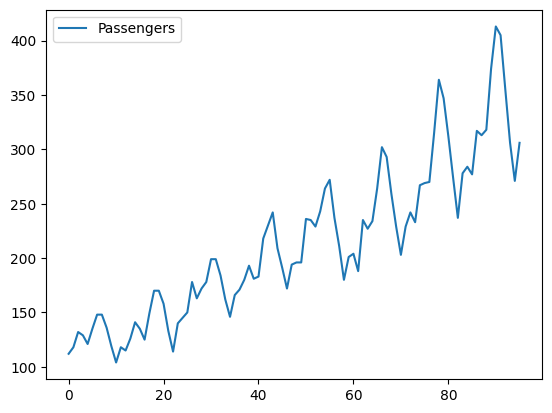

In [ ]:
df.plot()

#**Splitting Data**

In [ ]:
Train = df.head(84)
Test = df.tail(12)

In [ ]:
Test

,Month,Passengers
84,Jan-02,284
85,Feb-02,277
86,Mar-02,317
87,Apr-02,313
88,May-02,318
89,Jun-02,374
90,Jul-02,413
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306


In [ ]:
df['Passengers'].max()

413

#**MOVING AVERAGE**

In [ ]:
df['Passengers'].rolling(2)

Rolling [window=2,center=False,axis=0,method=single]

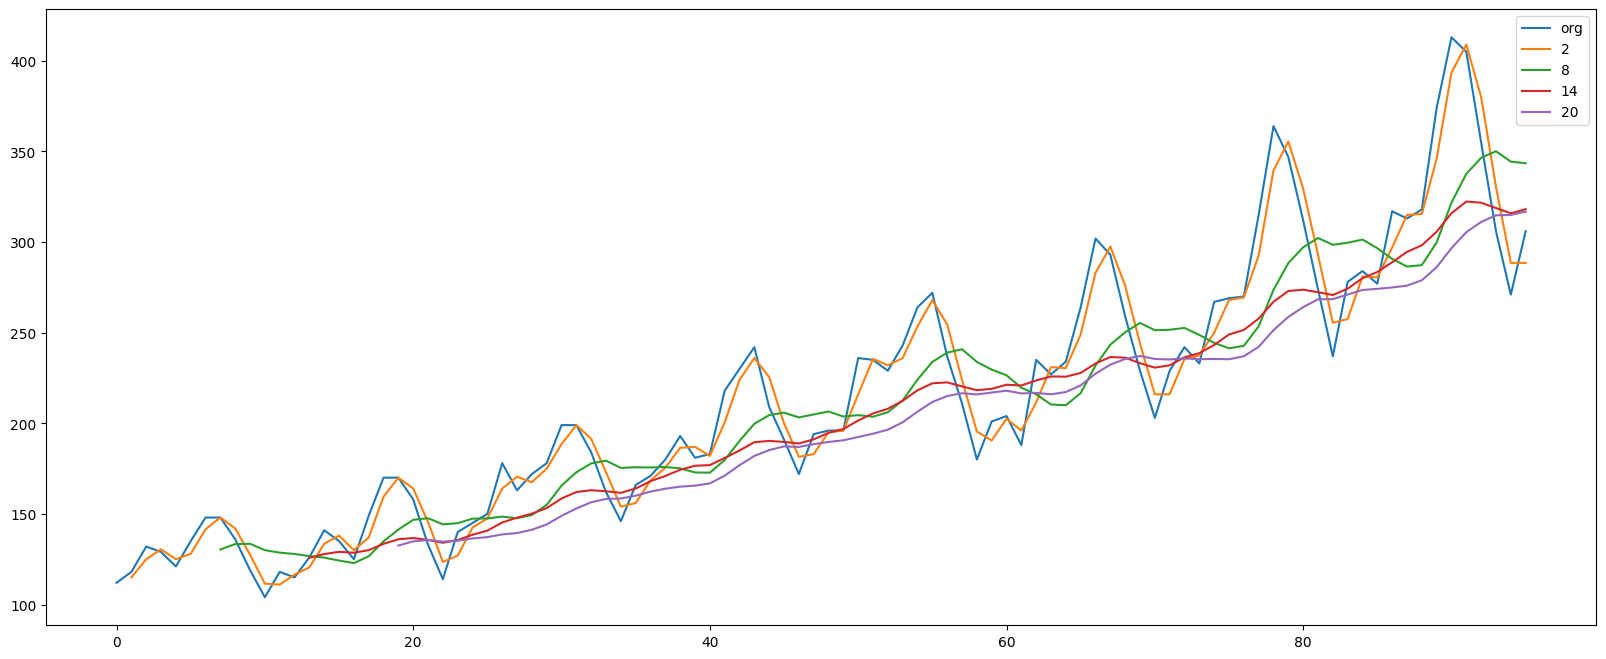

In [ ]:
plt.figure(figsize=(20,8))
df['Passengers'].plot(label='org')
for i in range(2,24,6):
  df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

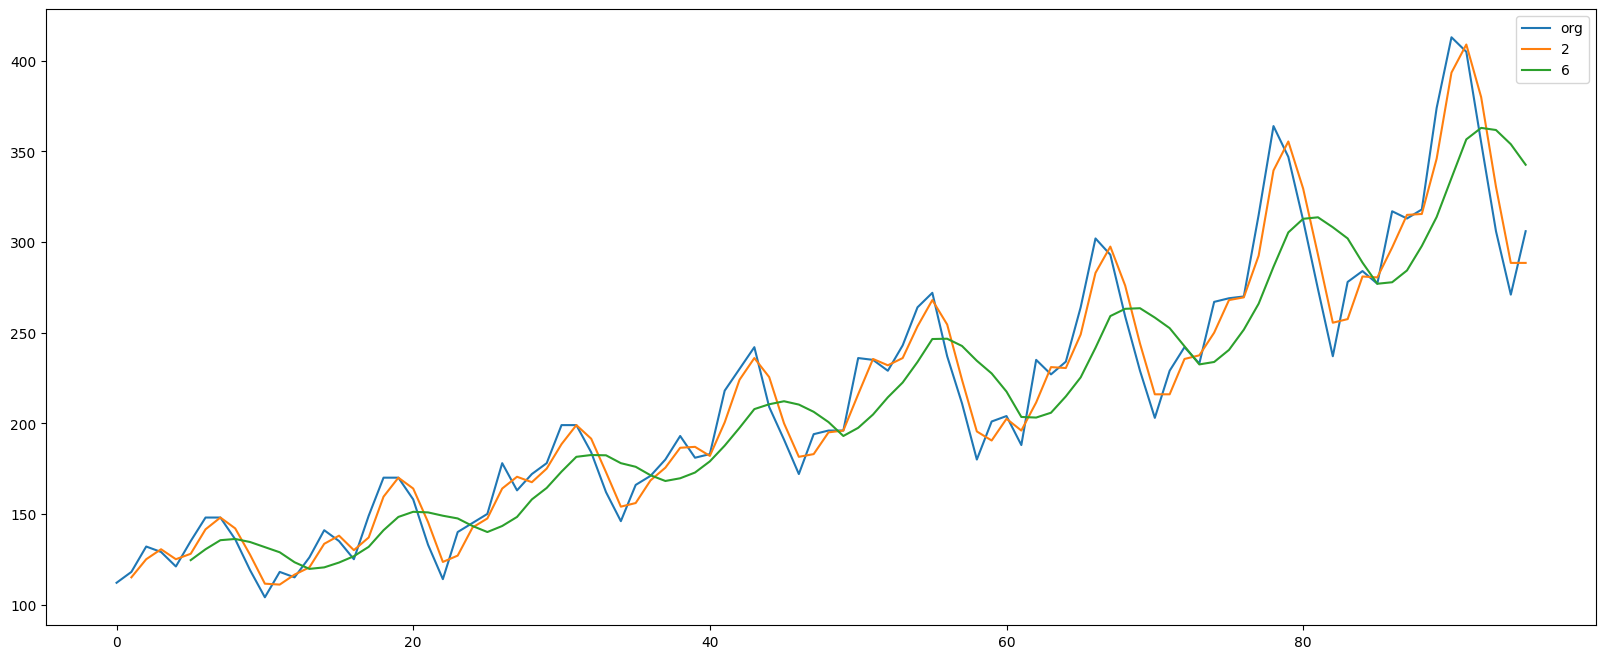

In [ ]:
plt.figure(figsize=(20,8))
df['Passengers'].plot(label='org')
for i in range(2,10,4):
  df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

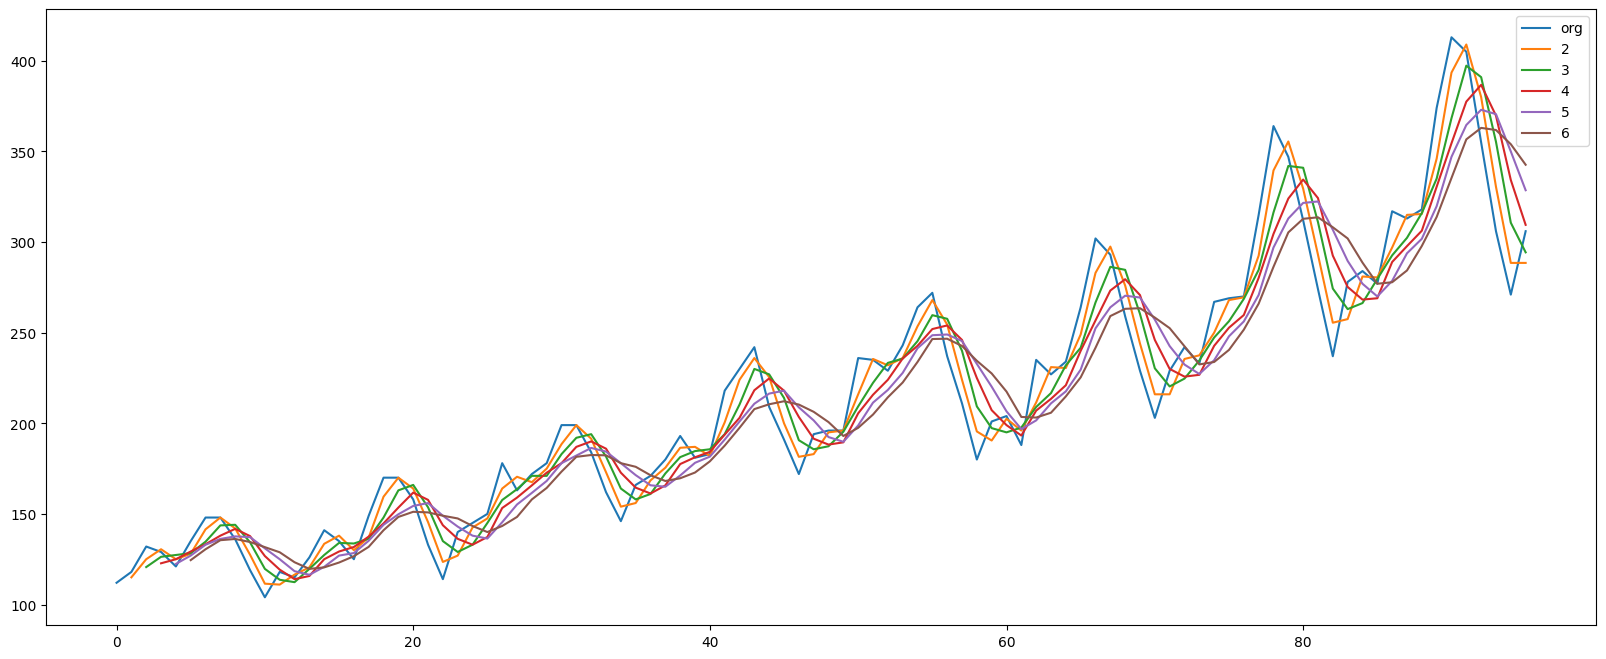

In [ ]:
plt.figure(figsize=(20,8))
df['Passengers'].plot(label='org')
for i in range(2,7,1):
  df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#**Time Series Decomposition Plot**

<Figure size 1500x1000 with 0 Axes>

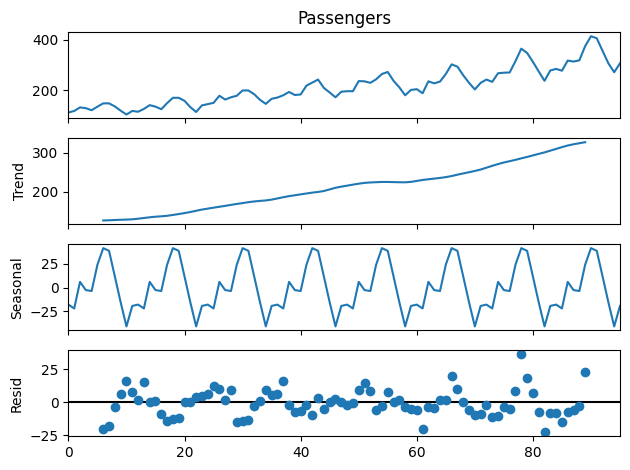

In [ ]:
plt.figure(figsize=(15,10))
decom = seasonal_decompose(df['Passengers'],period=12)
decom.plot()
plt.show()

#**ACF plots and PACF plots**

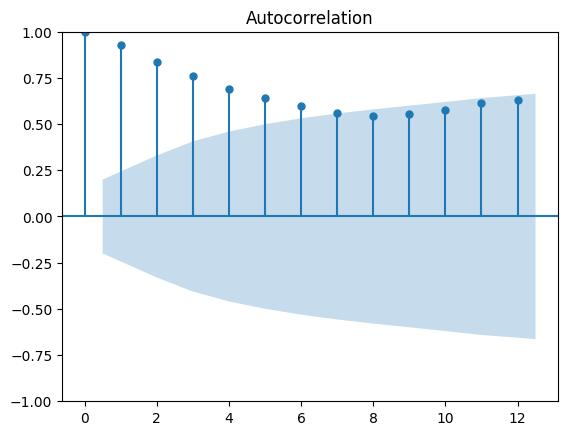

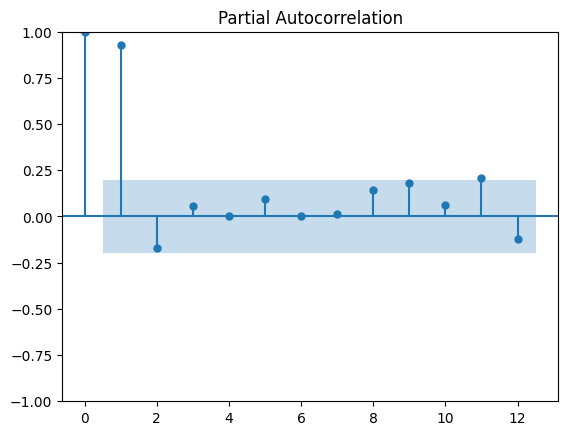

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df['Passengers'],lags=12)
tsa_plots.plot_pacf(df['Passengers'], lags=12)
plt.show()

#**Simple Exponential Smoothing**

In [ ]:
model = SimpleExpSmoothing(Train['Passengers'])
a = model.fit(smoothing_level=0.2)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
Test.index[-1]

95

In [ ]:
pred = a.predict(start=Test.index[0],end=Test.index[-1])
pred

84    282.369838
85    282.369838
86    282.369838
87    282.369838
88    282.369838
89    282.369838
90    282.369838
91    282.369838
92    282.369838
93    282.369838
94    282.369838
95    282.369838
dtype: float64

In [ ]:
import numpy as np
def MAPE(pred,org):
  temp = np.abs((pred-org)/org)*100
  return np.mean(temp)

In [ ]:
b = np.array(a)

In [ ]:
MAPE(pred,Test['Passengers'])

13.411274758932686

In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9]:
  model = SimpleExpSmoothing(Train['Passengers'])
  a = model.fit(smoothing_level=i)
  pred = a.predict(start=Test.index[0],end=Test.index[-1])
  print(i,':',MAPE(pred,Test['Passengers']))

0.1 : 15.814014823279152
0.2 : 13.411274758932686
0.3 : 13.623509527771132
0.4 : 14.422662423552017
0.5 : 15.403823016584747
0.7 : 16.12300075964089
0.8 : 15.75701382264588
0.9 : 15.092823851087173


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

#**Holt Winter Exponential Smoothing**

In [ ]:
hw = Holt(Train['Passengers'])
model1 = hw.fit(smoothing_level=0.8, smoothing_trend=0.2)
pred = model1.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred,Test['Passengers'])

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


23.530719644076488

#**Holt Winter Exponential with additive seasonality and additive trend**

In [ ]:
hwe = ExponentialSmoothing(Train['Passengers'],seasonal='add',trend='add',seasonal_periods=12)
model2 = hwe.fit()
pred = model2.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred,Test['Passengers'])

5.730704946852847

#**Holt Winter Exponential smoothing with multiplicative seasonality and additive trend**

In [ ]:
hwe1 = ExponentialSmoothing(Train['Passengers'], seasonal='mul',trend='add',seasonal_periods=12)
model3 = hwe1.fit()
pred = model3.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred,Test['Passengers'])

2.821093186644687

#**Final Model**

In [ ]:
hwe2 = ExponentialSmoothing(df['Passengers'],seasonal='add',trend='add',seasonal_periods=12)
modelf = hwe2.fit()

In [ ]:
modelf.forecast(10)

96     319.235270
97     311.528386
98     350.278691
99     346.984976
100    351.845022
101    403.925707
102    440.566797
103    427.446477
104    376.628169
105    329.767502
dtype: float64

#**NEXT DATASET**

In [ ]:
df1 = pd.read_csv("/content/CocaCola_Sales_Rawdata.csv",index_col=0,parse_dates=True)

In [ ]:
df1.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


{'whiskers': [<matplotlib.lines.Line2D at 0x7ac3496465f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ac349646b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ac349646350>],
 'medians': [<matplotlib.lines.Line2D at 0x7ac349647070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ac349647310>],
 'means': []}

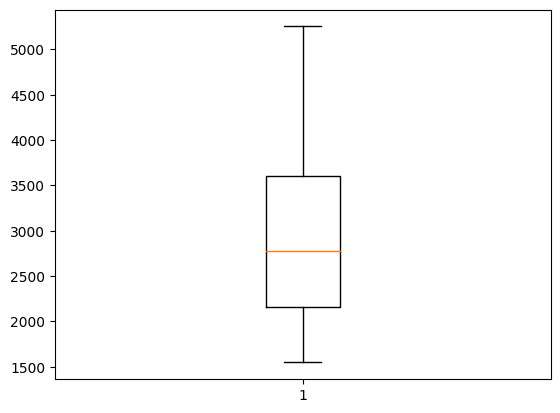

In [ ]:
plt.boxplot(df1['Sales'])

<Axes: xlabel='Quarter'>

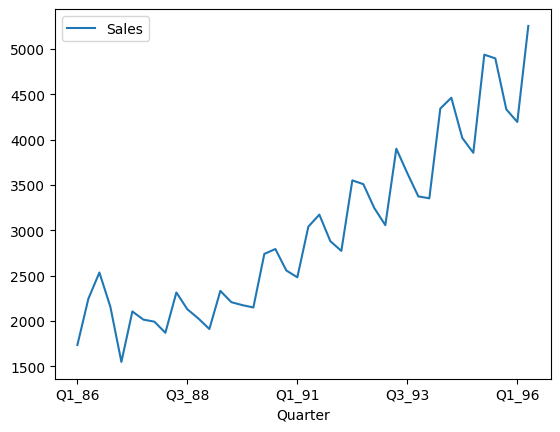

In [ ]:
df1.plot()

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

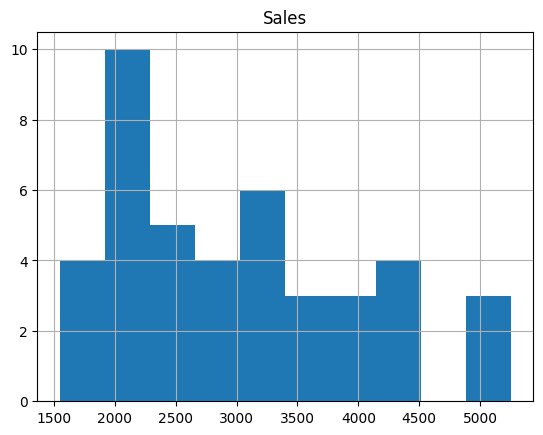

In [ ]:
df1.hist()

<Axes: ylabel='Density'>

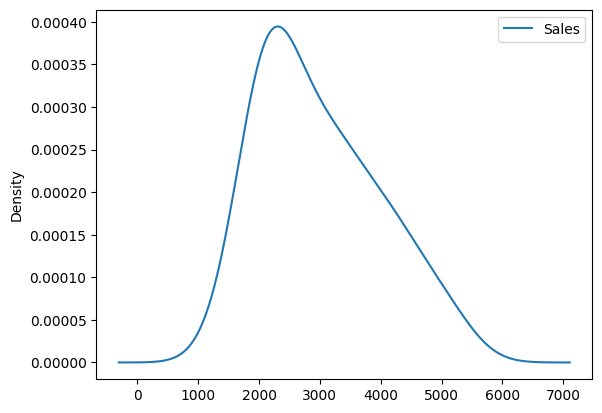

In [ ]:
df1.plot(kind='kde')

In [ ]:
len(df1)

42

#**MOVING AVERAGE**

In [ ]:
df1['Sales'].rolling(2)

Rolling [window=2,center=False,axis=0,method=single]

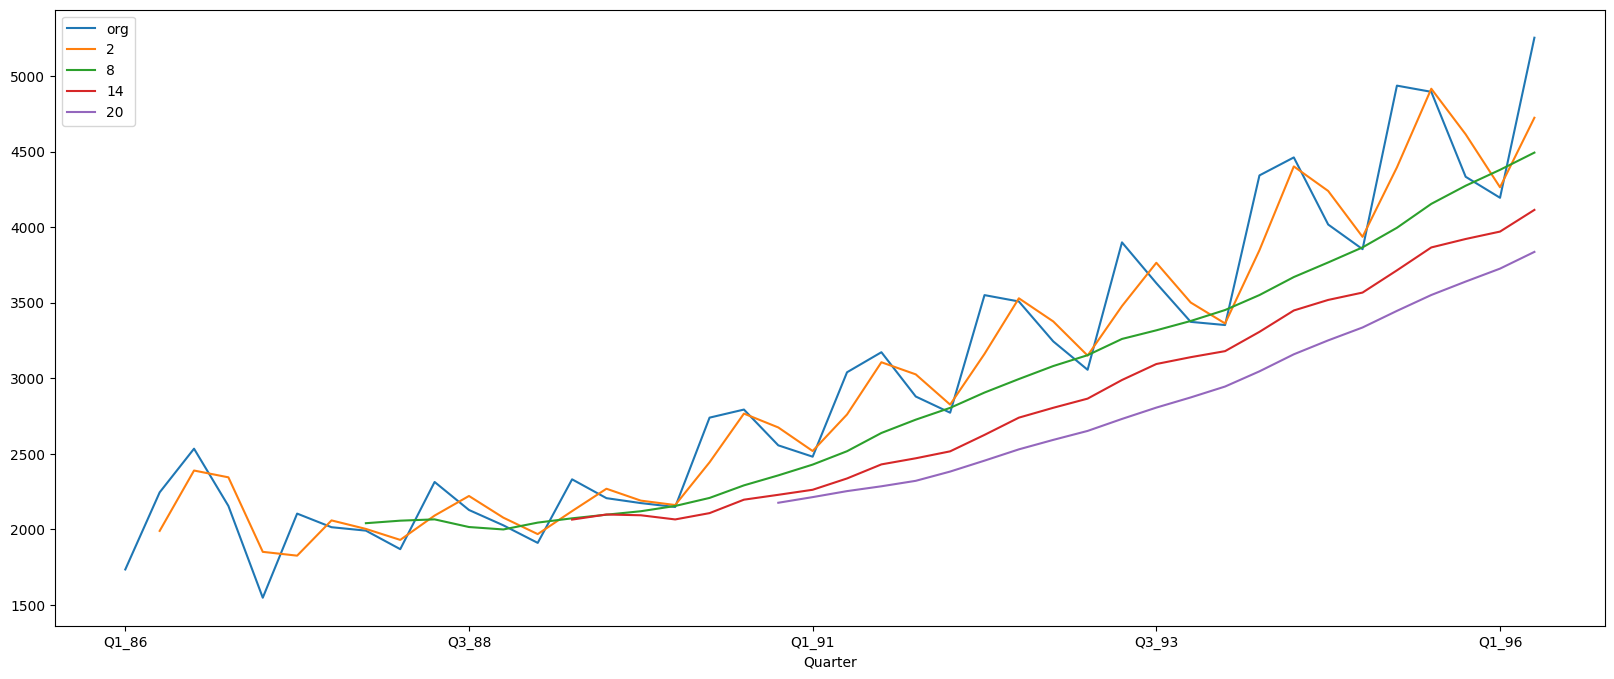

In [ ]:
plt.figure(figsize=(20,8))
df1['Sales'].plot(label='org')
for i in range(2,24,6):
  df1['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

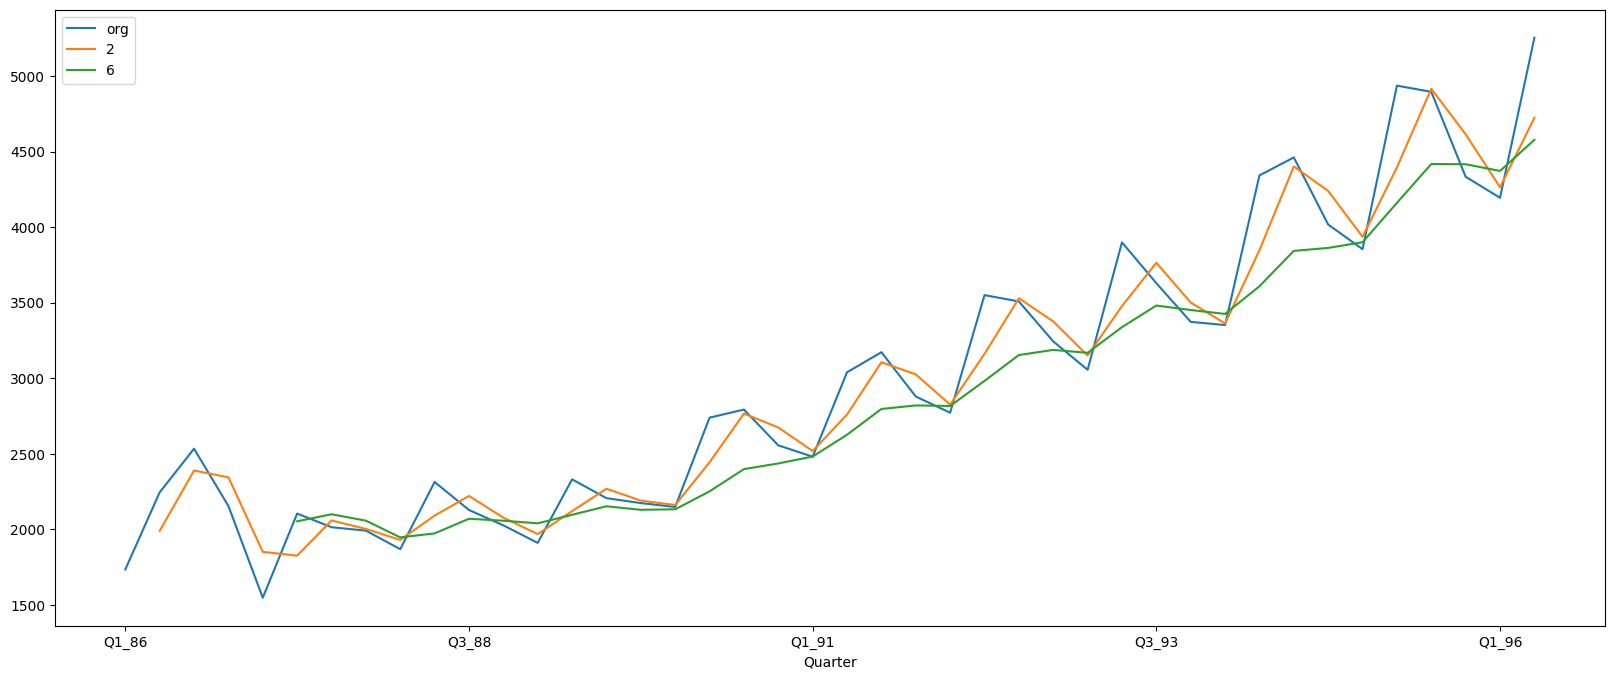

In [ ]:
plt.figure(figsize=(20,8))
df1['Sales'].plot(label='org')
for i in range(2,10,4):
  df1['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

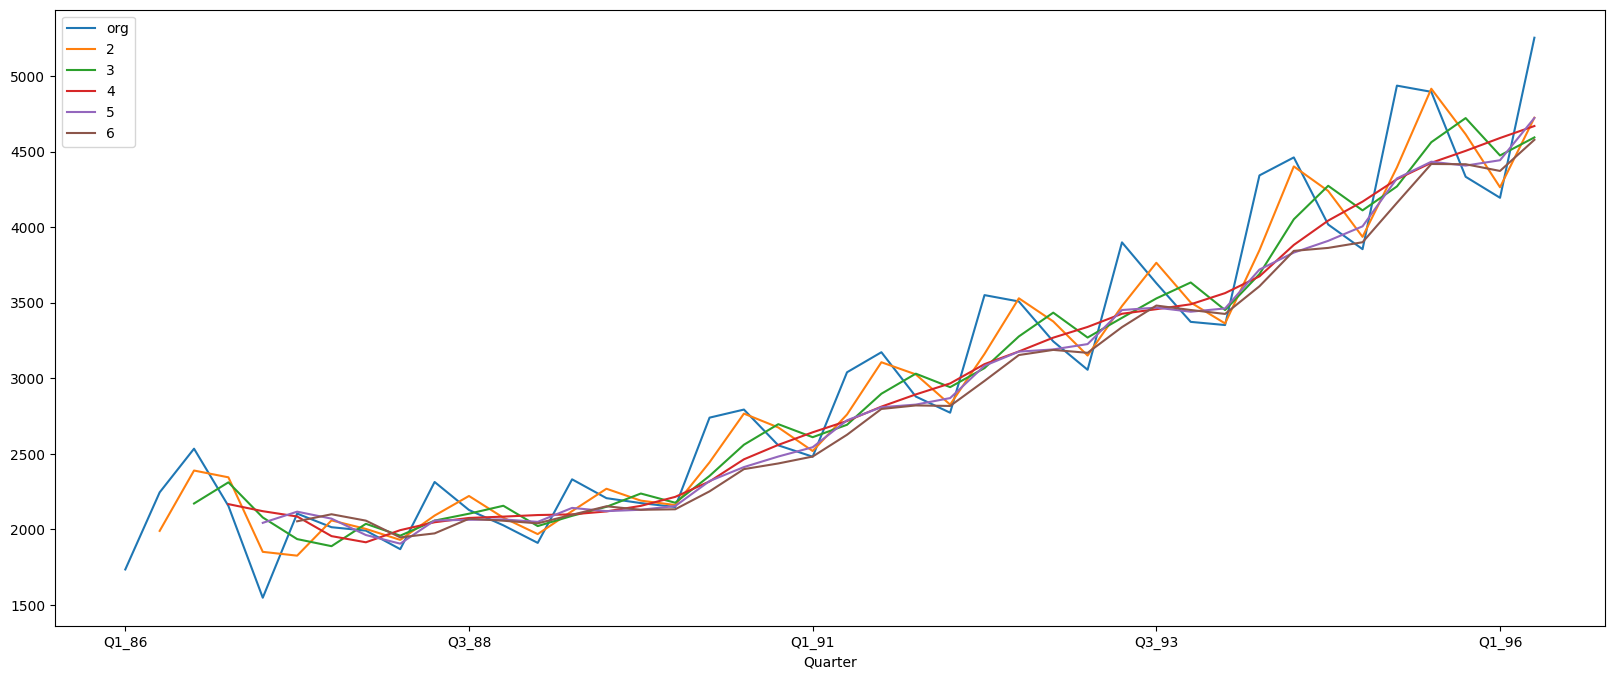

In [ ]:
plt.figure(figsize=(20,8))
df1['Sales'].plot(label='org')
for i in range(2,7,1):
  df1['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#**Time Series Decomposition Plot**

<Figure size 1500x1000 with 0 Axes>

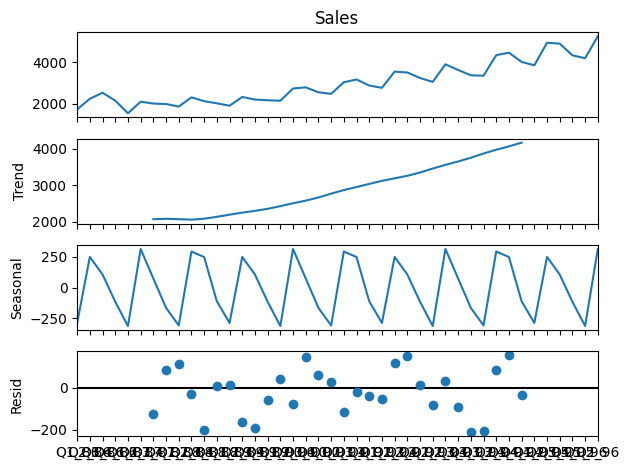

In [ ]:
plt.figure(figsize=(15,10))
decom = seasonal_decompose(df1['Sales'],period=12)
decom.plot()
plt.show()

In [ ]:
df1.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


#**ACF and PACF Plot**

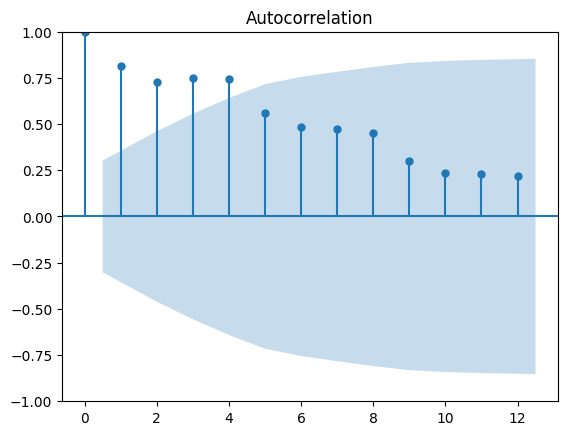

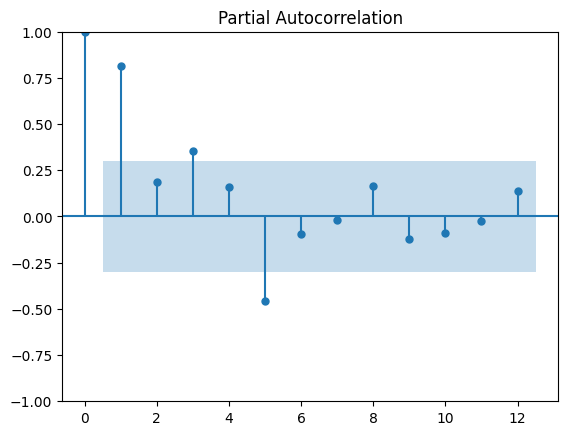

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df1['Sales'],lags=12)
tsa_plots.plot_pacf(df1['Sales'], lags=12)
plt.show()

#**Splitting Data**

In [ ]:
df1 = pd.read_csv("/content/CocaCola_Sales_Rawdata.csv")
Train = df1.head(30)
Test = df1.tail(12)

#**Simple Smoothing**

In [ ]:
model = SimpleExpSmoothing(Train['Sales'])
a = model.fit(smoothing_level=0.2)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
Test.index[0]

30

In [ ]:
pred = a.predict(start=Test.index[0],end=Test.index[-1])
pred

30    3225.544241
31    3225.544241
32    3225.544241
33    3225.544241
34    3225.544241
35    3225.544241
36    3225.544241
37    3225.544241
38    3225.544241
39    3225.544241
40    3225.544241
41    3225.544241
dtype: float64

In [ ]:
import numpy as np
def MAPE(pred,org):
  temp = np.abs((pred-org)/org)*100
  return np.mean(temp)

MAPE(pred,Test['Sales'])


22.05689642017047

In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9]:
  model = SimpleExpSmoothing(Train['Sales'])
  a = model.fit(smoothing_level=i)
  pred = a.predict(start=Test.index[0],end=Test.index[-1])
  print(i,':',MAPE(pred,Test['Sales']))

0.1 : 30.264100836673762
0.2 : 22.05689642017047
0.3 : 18.53010070796536
0.4 : 17.235580589480737
0.5 : 16.243118984773776
0.7 : 14.566342283959278
0.8 : 13.879211949990394
0.9 : 13.135678878611394


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

#**Holt Winter Exponential Smoothing**

In [ ]:
hw = Holt(Train['Sales'])
model1 = hw.fit(smoothing_level=0.8, smoothing_trend=0.2)
pred = model1.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred,Test['Sales'])

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


11.247566037935906

#**Holt Winter Exponential with additive seasonality and additive trend**

In [ ]:
hwe = ExponentialSmoothing(Train['Sales'],seasonal='add',trend='add',seasonal_periods=12)
model2 = hwe.fit()
pred = model2.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred,Test['Sales'])

5.378315007686514

#**Holt Winter Exponential with Multiplicative Seasonality and additive trend**

In [ ]:
hwe1 = ExponentialSmoothing(Train['Sales'], seasonal='mul',trend='add',seasonal_periods=12)
model3 = hwe1.fit()
pred = model3.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred,Test['Sales'])

8.964592747016642

#**Final Model**

In [ ]:
hwe2 = ExponentialSmoothing(df1['Sales'],seasonal='add',trend='add',seasonal_periods=12)
modelf = hwe2.fit()

In [ ]:
modelf.forecast(10)

42    5071.275563
43    4943.958224
44    4904.726309
45    5594.360250
46    5637.462805
47    5381.501032
48    5284.174640
49    6035.740847
50    6117.541521
51    5834.264689
dtype: float64